In [86]:
import requests
from urllib.parse import urlencode
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
sns.set()
from matplotlib.pyplot import figure

In [88]:
files = [
    {'public_key': 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ', 'filename': 'assessments.csv'},
    {'public_key': 'https://disk.yandex.ru/d/DYd4M5b_8RETsA', 'filename': 'studentAssessment.csv'},
    {'public_key': 'https://disk.yandex.ru/d/lqHnH8NOZ458iw', 'filename': 'studentRegistration.csv'}
]

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

for file in files:
    final_url = base_url + urlencode(dict(public_key=file['public_key']))
    response = requests.get(final_url)
    download_url = response.json()['href']
    
    download_response = requests.get(download_url)
    with open(file['filename'], 'wb') as f:
        f.write(download_response.content)
    
    globals()[file['filename'].replace('.csv', '')] = pd.read_csv(file['filename'], encoding='Windows-1251')

**<span style="background-color: #CBF2CF"> 1. Сколько студентов успешно сдали только один курс?</span>**

In [90]:
my_df = assessments.merge(studentAssessment, how='inner', on='id_assessment')
my_df

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0


In [91]:
my_df.query('score >= 40 and assessment_type == "Exam"')\
.groupby('id_student')\
.agg({'id_assessment':'count'})\
.query('id_assessment == 1').count()

id_assessment    3802
dtype: int64

**<span style="background-color: #CBF2CF"> **2. Выяви самый сложный и самый простой экзамен:
найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью
завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
курс может начаться в одном семестре и закончиться в другом семестре**</span>**

In [93]:
all_test = my_df.groupby(['code_module', 'code_presentation', 'assessment_type', 'id_assessment'], as_index = False)\
.agg({'id_student':'count'})\
.rename(columns = {'id_student':'all_test'})
all_test

,code_module,code_presentation,assessment_type,id_assessment,all_test
0,AAA,2013J,TMA,1752,359
1,AAA,2013J,TMA,1753,342
2,AAA,2013J,TMA,1754,331
3,AAA,2013J,TMA,1755,303
4,AAA,2013J,TMA,1756,298
...,...,...,...,...,...
183,GGG,2014J,CMA,37442,416
184,GGG,2014J,CMA,37443,344
185,GGG,2014J,TMA,37435,586
186,GGG,2014J,TMA,37436,540


In [94]:
success_test = my_df.query('score >= 40')\
.groupby(['code_module', 'code_presentation', 'assessment_type', 'id_assessment'], as_index = False)\
.agg({'id_student':'count'})\
.rename(columns = {'id_student':'success_test'})
success_test

,code_module,code_presentation,assessment_type,id_assessment,success_test
0,AAA,2013J,TMA,1752,352
1,AAA,2013J,TMA,1753,330
2,AAA,2013J,TMA,1754,325
3,AAA,2013J,TMA,1755,294
4,AAA,2013J,TMA,1756,290
...,...,...,...,...,...
183,GGG,2014J,CMA,37442,396
184,GGG,2014J,CMA,37443,336
185,GGG,2014J,TMA,37435,575
186,GGG,2014J,TMA,37436,528


In [95]:
df2 = all_test.merge(success_test, how = 'inner', on = ['code_module', 'code_presentation', 'assessment_type', 'id_assessment'])
df2['completion'] = round(df2.success_test / df2.all_test * 100, 2)
df2

,code_module,code_presentation,assessment_type,id_assessment,all_test,success_test,completion
0,AAA,2013J,TMA,1752,359,352,98.05
1,AAA,2013J,TMA,1753,342,330,96.49
2,AAA,2013J,TMA,1754,331,325,98.19
3,AAA,2013J,TMA,1755,303,294,97.03
4,AAA,2013J,TMA,1756,298,290,97.32
...,...,...,...,...,...,...,...
183,GGG,2014J,CMA,37442,416,396,95.19
184,GGG,2014J,CMA,37443,344,336,97.67
185,GGG,2014J,TMA,37435,586,575,98.12
186,GGG,2014J,TMA,37436,540,528,97.78


In [96]:
df2.sort_values(by='completion', ascending=False)

,code_module,code_presentation,assessment_type,id_assessment,all_test,success_test,completion
171,GGG,2014B,CMA,37429,559,559,100.00
152,FFF,2014J,CMA,34907,1234,1234,100.00
138,FFF,2014B,CMA,34892,857,857,100.00
126,FFF,2013J,CMA,34879,1352,1352,100.00
142,FFF,2014B,CMA,34896,747,747,100.00
...,...,...,...,...,...,...,...
48,CCC,2014B,CMA,24286,1346,1089,80.91
86,DDD,2013J,TMA,25353,845,664,78.58
79,DDD,2013B,TMA,25339,503,392,77.93
93,DDD,2014B,TMA,25360,450,334,74.22


In [97]:
dk = df2.query('assessment_type == "Exam"').sort_values(by='completion', ascending=False)
dk

,code_module,code_presentation,assessment_type,id_assessment,all_test,success_test,completion
87,DDD,2014B,Exam,25361,524,485,92.56
80,DDD,2013J,Exam,25354,968,878,90.70
52,CCC,2014B,Exam,24290,747,664,88.89
94,DDD,2014J,Exam,25368,950,842,88.63
61,CCC,2014J,Exam,24299,1168,1019,87.24
73,DDD,2013B,Exam,25340,602,504,83.72


In [98]:
print('ID самого легкого теста с высокой завершаемостью', dk.id_assessment.loc[dk['completion'].idxmax()])

ID самого легкого теста с высокой завершаемостью 25361


In [99]:
print('ID самого сложного теста с низкой завершаемостью', dk.id_assessment.loc[dk['completion'].idxmin()])

ID самого сложного теста с низкой завершаемостью 25340


**<span style="background-color: #CBF2CF"> **3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).**</span>**

In [101]:
df3 = assessments.merge(studentAssessment, how='inner', on='id_assessment')
df3 = df3.query('score >= 40 and assessment_type == "Exam"')
df3

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
52928,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0
...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0


In [102]:
table = pd.pivot_table(df3, values='date_submitted', index='code_module', columns='code_presentation', aggfunc='mean', fill_value=0)
table.round(0)
## срок успешной сдачи экзаменов (количество дней с начала семестра) по каждому предмету с разбивкой по семестрам

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
CCC,0.0,0.0,232.0,244.0
DDD,230.0,240.0,235.0,243.0


In [103]:
dr = df3.query('score >= 40 and assessment_type == "Exam"')\
.groupby(['code_module'], as_index=False)\
.agg(({'date_submitted':'mean'}))
dr.round(0)
## срок успешной сдачи экзаменов по каждому предмету в рамках курса

,code_module,date_submitted
0,CCC,239.0
1,DDD,238.0


**<span style="background-color: #CBF2CF"> 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них.
А также предметы с самым большим оттоком (ТОП-3).</span>**

In [106]:
df4 = studentRegistration.groupby(['code_module'], as_index = False)\
.agg({'id_student':'nunique'})\
.rename(columns={'id_student':'count'})\
.sort_values(by=['count'], ascending=False).head(3)
print(*df4.code_module.to_list(), '- самые популярные предметы по количеству регистраций на них')

BBB FFF DDD - самые популярные предметы по количеству регистраций на них


In [119]:
df5 = studentRegistration[studentRegistration['date_unregistration'].notna()]
df5 = df5.groupby(['code_module'], as_index = False)\
.agg({'id_student':'nunique'})\
.rename(columns={'id_student':'count'})\
.sort_values(by=['count'], ascending=False).head(3)
print(*df5.code_module.to_list(), '- предметы с самым большим оттоком')

BBB FFF DDD - предметы с самым большим оттоком


**<span style="background-color: #CBF2CF"> 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.</span>**

In [152]:
dl = df2.query('assessment_type == "Exam"').sort_values(by='completion', ascending=False)
table1 = pd.pivot_table(dl, values='completion', index='code_module', columns=['code_presentation'], aggfunc='min', fill_value=0)
table1

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
CCC,0.00,0.0,88.89,87.24
DDD,83.72,90.7,92.56,88.63


In [154]:
df3 = assessments.merge(studentAssessment, how='inner', on='id_assessment')
df3 = df3.query('score >= 40 and assessment_type == "Exam"')
table2 = pd.pivot_table(df3, values='date_submitted', index='code_module', columns=['code_presentation'], aggfunc='mean', fill_value=0)
table2.round(0)

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
CCC,0.0,0.0,232.0,244.0
DDD,230.0,240.0,235.0,243.0


**<span style="background-color: #CBF2CF"> 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации.
Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию.
В адаптированной кластеризации можешь выбрать следующие метрики:
R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен.
Подробно опиши, как ты создавал кластеры.</span>**

**Recency (R):**

Рассчитывается как среднее время сдачи экзаменов студентами, которые успешно сдали экзамены (оценка >= 40).

Чем меньше значение, тем "свежее" активность студента.

In [158]:
recency = my_df.query('assessment_type == "Exam" and score >= 40')\
.groupby('id_student', as_index = False)\
.agg({'date_submitted':'mean'})\
.rename(columns={'date_submitted' : 'recency'}).sort_values(by=['recency'], ascending=False)
recency

,id_student,recency
1450,555498,285.0
3860,2341830,279.0
1448,555008,266.0
456,352637,259.0
3544,695916,256.0
...,...,...
3733,1982845,229.0
3952,2505501,229.0
3955,2508785,229.0
97,112245,229.0


In [160]:
all = my_df.groupby('id_student', as_index = False)\
.agg({'id_assessment':'count'})\
.rename(columns = {'id_assessment':'all_test'})
all

,id_student,all_test
0,6516,5
1,8462,7
2,11391,5
3,23629,4
4,23698,9
...,...,...
23364,2698251,7
23365,2698257,5
23366,2698535,8
23367,2698577,5


In [162]:
success = my_df.query('score >= 40').groupby('id_student', as_index = False)\
.agg({'id_assessment':'count'})\
.rename(columns = {'id_assessment':'success_test'})
success

,id_student,success_test
0,6516,5
1,8462,7
2,11391,5
3,23629,4
4,23698,9
...,...,...
22968,2698251,6
22969,2698257,5
22970,2698535,4
22971,2698577,5


**Frequency (F):**

Рассчитывается как процент успешно сданных тестов от общего количества тестов.

Чем выше значение, тем чаще студент успешно завершает курсы.

In [165]:
frequency = all.merge(success, how = 'inner', on = 'id_student')
frequency['frequency'] = round(frequency.success_test / frequency.all_test * 100, 2)
frequency = frequency[['id_student', 'frequency']]
frequency

,id_student,frequency
0,6516,100.00
1,8462,100.00
2,11391,100.00
3,23629,100.00
4,23698,100.00
...,...,...
22968,2698251,85.71
22969,2698257,100.00
22970,2698535,50.00
22971,2698577,100.00


**Monetary (M):**

Рассчитывается как средний балл за экзамены.

Чем выше значение, тем лучше успеваемость студента.

In [168]:
monetary = my_df.query('assessment_type == "Exam"').groupby('id_student', as_index = False)\
.agg({'score':'mean'})\
.rename(columns = {'score':'monetary'})
monetary

,id_student,monetary
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0
...,...,...
4628,2694886,69.0
4629,2694933,73.0
4630,2695608,73.0
4631,2697181,80.0


In [170]:
rfm_table = recency.merge(frequency, how = 'inner', on = 'id_student')\
.merge(monetary, how = 'inner', on = 'id_student')\
[['id_student', 'recency', 'frequency', 'monetary']]
rfm_table

,id_student,recency,frequency,monetary
0,555498,285.0,100.00,58.0
1,2341830,279.0,100.00,49.0
2,555008,266.0,100.00,56.0
3,352637,259.0,100.00,96.0
4,695916,256.0,100.00,67.0
...,...,...,...,...
4092,1982845,229.0,92.86,53.0
4093,2505501,229.0,84.62,60.0
4094,2508785,229.0,71.43,40.0
4095,112245,229.0,100.00,58.0


In [172]:
rfm_table.describe()

,id_student,recency,frequency,monetary
count,4.097000e+03,4097.000000,4097.000000,4097.000000
mean,7.382490e+05,238.466317,96.121377,69.639370
std,5.858543e+05,5.632457,8.879616,17.050648
min,2.369800e+04,229.000000,28.570000,32.000000
25%,5.044290e+05,234.000000,100.000000,56.000000
50%,5.920930e+05,241.000000,100.000000,69.000000
75%,6.488410e+05,243.000000,100.000000,84.000000
max,2.698251e+06,285.000000,100.000000,100.000000


**Квантили:**

Используются для разделения студентов на 5 групп по каждому показателю (R, F, M).

In [175]:
quintiles = rfm_table[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'frequency': {0.2: 93.41400000000002, 0.4: 100.0, 0.6: 100.0, 0.8: 100.0},
 'monetary': {0.2: 53.0, 0.4: 64.0, 0.6: 74.29999999999995, 0.8: 87.0}}

Меньшее значение среднего времени сдачи одного экзамена лучше, в то время как более высокая завершаемость курсов и среднее количество баллов, полученных за экзамен, лучше.

In [178]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [180]:
rfm_table['R'] = rfm_table['recency'].apply(lambda x: r_score(x))
rfm_table['F'] = rfm_table['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm_table['M'] = rfm_table['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [182]:
rfm_table['RFM Score'] = rfm_table['R'].map(str) + rfm_table['F'].map(str) + rfm_table['M'].map(str)
rfm_table

,id_student,recency,frequency,monetary,R,F,M,RFM Score
0,555498,285.0,100.00,58.0,1,2,2,122
1,2341830,279.0,100.00,49.0,1,2,1,121
2,555008,266.0,100.00,56.0,1,2,2,122
3,352637,259.0,100.00,96.0,1,2,5,125
4,695916,256.0,100.00,67.0,1,2,3,123
...,...,...,...,...,...,...,...,...
4092,1982845,229.0,92.86,53.0,5,1,1,511
4093,2505501,229.0,84.62,60.0,5,1,2,512
4094,2508785,229.0,71.43,40.0,5,1,1,511
4095,112245,229.0,100.00,58.0,5,2,2,522


R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен.

In [185]:
segt_map = {
    r'[1-2][1-2]': 'Низкая активность',
    r'[1-2][3-4]': 'Риск оттока',
    r'[1-2]5': 'Критически важные',
    r'3[1-2]': 'Пассивные',
    r'33': 'Требуют внимания',
    r'[3-4][4-5]': 'Лояльные',
    r'41': 'Новые и перспективные',
    r'51': 'Новички',
    r'[4-5][2-3]': 'Потенциальные лидеры',
    r'5[4-5]': 'Топовые студенты'
}

rfm_table['Segment'] = rfm_table['R'].map(str) + rfm_table['F'].map(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(segt_map, regex=True)
rfm_table

,id_student,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,555498,285.0,100.00,58.0,1,2,2,122,Низкая активность
1,2341830,279.0,100.00,49.0,1,2,1,121,Низкая активность
2,555008,266.0,100.00,56.0,1,2,2,122,Низкая активность
3,352637,259.0,100.00,96.0,1,2,5,125,Низкая активность
4,695916,256.0,100.00,67.0,1,2,3,123,Низкая активность
...,...,...,...,...,...,...,...,...,...
4092,1982845,229.0,92.86,53.0,5,1,1,511,Новички
4093,2505501,229.0,84.62,60.0,5,1,2,512,Новички
4094,2508785,229.0,71.43,40.0,5,1,1,511,Новички
4095,112245,229.0,100.00,58.0,5,2,2,522,Потенциальные лидеры


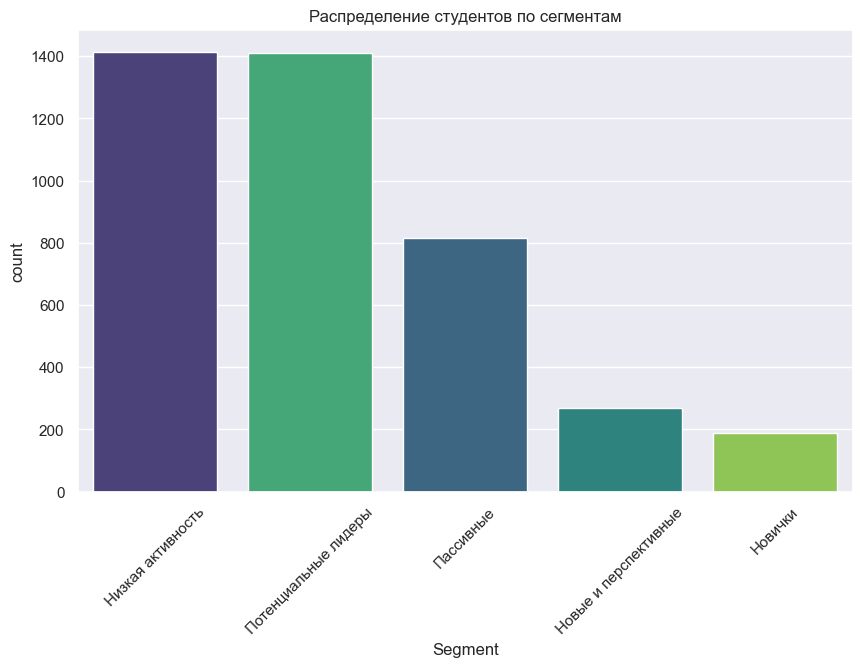

In [187]:
# Распределение сегментов
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_table, x='Segment', order=rfm_table['Segment'].value_counts().index, hue='Segment', palette='viridis')
plt.title('Распределение студентов по сегментам')
plt.xticks(rotation=45)
plt.show()

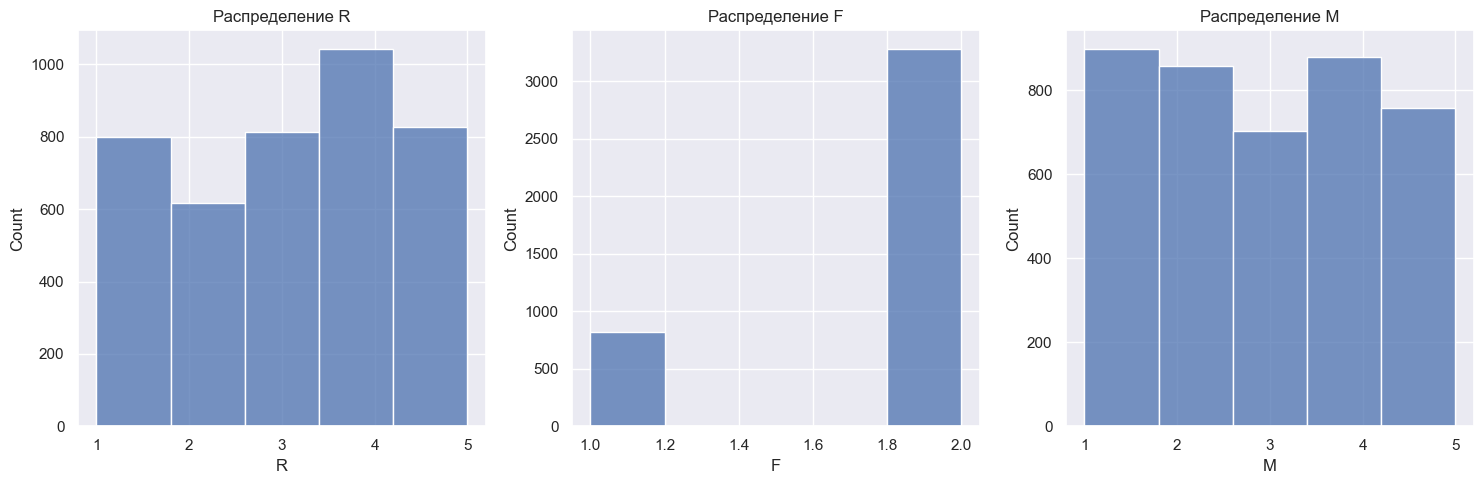

In [189]:
# Распределение R, F, M
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_table['R'], bins=5, kde=False)
plt.title('Распределение R')

plt.subplot(1, 3, 2)
sns.histplot(rfm_table['F'], bins=5, kde=False)
plt.title('Распределение F')

plt.subplot(1, 3, 3)
sns.histplot(rfm_table['M'], bins=5, kde=False)
plt.title('Распределение M')

plt.tight_layout()
plt.show()

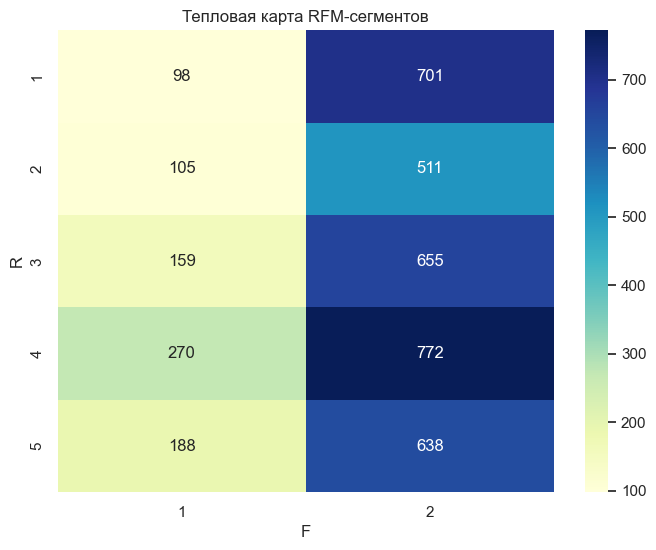

In [191]:
# Тепловая карта RFM-сегментов
rfm_crosstab = pd.crosstab(rfm_table['R'], rfm_table['F'])
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Тепловая карта RFM-сегментов')
plt.xlabel('F')
plt.ylabel('R')
plt.show()

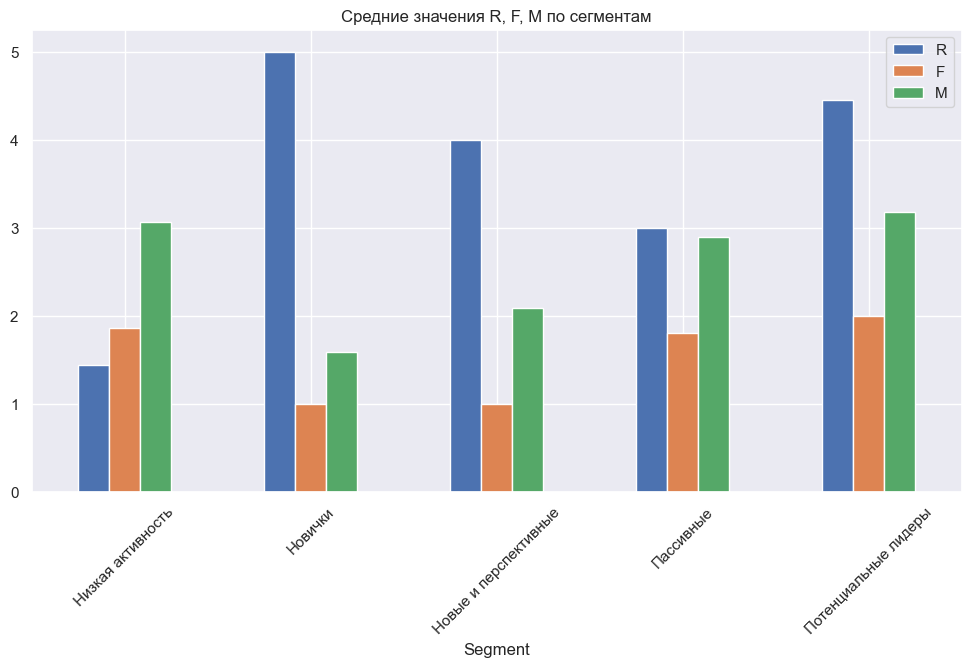

In [193]:
# Средние значения R, F, M по сегментам
segment_metrics = rfm_table.groupby('Segment').agg({'R': 'mean', 'F': 'mean', 'M': 'mean'})
segment_metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Средние значения R, F, M по сегментам')
plt.xticks(rotation=45)
plt.show()